<h1 id="Road Safety Data Analysis"><span style="color: #ff0000;"> Accident Data Analysis (Dept. for Transport - United Kingdom) 2005-2014</span></h1>

<h2 style="color: #000000;">Data Collection</h2>
<p>The data set files provide detailed data about the circumstances of personal injury road accidents in Great Britain from 2005 onwards, the types of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. Information on damage-only accidents, with no human casualties or accidents on private roads or car parks are not included in this data.</p>
<p>The data for analysis (2005 to 2014) will be used from <a href="https://data.gov.uk/dataset/road-accidents-safety-data">https://data.gov.uk/dataset/road-accidents-safety-data</a>.</p>
<p>Very few, if any, fatal accidents do not become known to the police although it is known that a considerable proportion of non-fatal injury accidents are not reported to the police. Figures for deaths refer to persons killed immediately or who died within 30 days of the accident.&nbsp; This is the usual international definition, adopted by the Vienna Convention in 1968.&nbsp;</p>
<p>&nbsp;</p>

<h2 style="text-align: left;">Initialize libraries, get data sets, consolidate and cleanse.</h2>

In [1]:
# Importing libraries and the data set
from pandas import Series, DataFrame
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 12, 4  # that's default image size for this interactive session
import scipy
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,  precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
from sklearn.metrics import roc_curve, auc

We will start exploring 2005-2015 consolidated dataset.

In [3]:
RoadSafetyData = pd.read_csv("Accidents2005to2014.csv")
RoadSafetyData.shape

(1640597, 17)

### We observe about 1.64+ M rows and 17 variables in the dataset. 

In [6]:
RoadSafetyData.dtypes

Unnamed: 0                     int64
﻿Accident_Index               object
Location_Easting_OSGR        float64
Location_Northing_OSGR       float64
Longitude                    float64
Latitude                     float64
Accident_Severity              int64
Number_of_Vehicles             int64
Number_of_Casualties           int64
Date                          object
Day_of_Week                    int64
Time                          object
Speed_limit                    int64
Light_Conditions               int64
Weather_Conditions             int64
Urban_or_Rural_Area            int64
LSOA_of_Accident_Location     object
dtype: object

In [7]:
RoadSafetyData.head(10)

,Unnamed: 0,﻿Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Speed_limit,Light_Conditions,Weather_Conditions,Urban_or_Rural_Area,LSOA_of_Accident_Location
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,2,1,1,04/01/2005,3,17:42,30,1,2,1,E01002849
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,3,1,1,05/01/2005,4,17:36,30,4,1,1,E01002909
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,3,2,1,06/01/2005,5,00:15,30,4,1,1,E01002857
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,3,1,1,07/01/2005,6,10:35,30,1,1,1,E01002840
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,3,1,1,10/01/2005,2,21:13,30,7,1,1,E01002863
5,5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,3,2,1,11/01/2005,3,12:40,30,1,2,1,E01002832
6,6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,3,2,1,13/01/2005,5,20:40,30,4,1,1,E01002875
7,7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,3,1,2,14/01/2005,6,17:35,30,1,1,1,E01002889
8,8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,3,2,2,15/01/2005,7,22:43,30,4,1,1,E01002900
9,9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,3,2,5,15/01/2005,7,16:00,30,1,1,1,E01002875


<h2>Exploratory Data Analysis</h2>
<p>In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with vizual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.</p>
<p>&nbsp;The pupose of this exercise is to visually analyze to answer the following questions:</p>
<p>1.&nbsp;Comparision of Accident Severity (Fatal, Severe or Slight Injury)<br />2. Number of accidents by&nbsp;Number_of_Vehicles<br />3. Number of accidents by&nbsp;Number_of_Casualties<br />4. Number of accidents by&nbsp;Day_of_Week<br />6. Number of accidents based on Speed Limit<br />7. Number of accidents based on&nbsp;Light_Conditions<br />8. Number of accidents based on&nbsp;Weather_Conditions<br />9. Number of accidents by&nbsp;Urban_or_Rural_Area<br />10. Plotting all accident loacation on a map using Latitude and Longitude</p>

In [4]:
RoadSafetyData['ACC_FATAL'] = np.where(RoadSafetyData.Accident_Severity == 1, 1 , 0)
RoadSafetyData['ACC_SEVERE'] = np.where(RoadSafetyData.Accident_Severity == 2, 1 , 0)
RoadSafetyData['ACC_SLIGHT'] = np.where(RoadSafetyData.Accident_Severity == 3, 1 , 0)

In [5]:
RoadSafetyData['ACC_COUNT'] = np.where(RoadSafetyData.Accident_Severity > 0 , 1 , 0)

### Checking for blank/NULL values in the data variables. 

In [10]:
bySeverity = RoadSafetyData.groupby('Accident_Severity')
bySeverity ['Accident_Severity'].count()

Accident_Severity
1      21382
2     222042
3    1397173
Name: Accident_Severity, dtype: int64

In [11]:
bySeverity = RoadSafetyData.groupby('Number_of_Vehicles')
bySeverity ['Number_of_Vehicles'].count()

Number_of_Vehicles
1     497873
2     974317
3     131155
4      27874
5       6157
6       1902
7        683
8        333
9        141
10        69
11        29
12        17
13        12
14        11
15         3
16         6
17         1
18         3
19         2
20         2
21         1
22         1
28         1
29         1
32         1
34         1
67         1
Name: Number_of_Vehicles, dtype: int64

In [12]:
byDayOfWeek = RoadSafetyData.groupby('Number_of_Casualties')
byDayOfWeek['Number_of_Casualties'].count()

Number_of_Casualties
1     1258011
2      263773
3       75197
4       27178
5       10030
6        3760
7        1294
8         553
9         271
10        147
11         95
12         51
13         46
14         29
15         21
16         16
17         17
18         11
19         13
20          4
21          9
22         11
23          4
24          4
25          4
26          7
27          3
28          2
29          6
32          1
33          1
35          1
36          2
38          1
40          2
41          2
42          3
43          2
45          2
46          1
47          1
48          1
51          2
54          1
62          1
63          1
68          1
70          1
87          2
93          1
Name: Number_of_Casualties, dtype: int64

In [13]:
byDayOfWeek = RoadSafetyData.groupby('Day_of_Week')
byDayOfWeek['Day_of_Week'].count()

Day_of_Week
1    180068
2    233238
3    245275
4    247022
5    246015
6    268985
7    219994
Name: Day_of_Week, dtype: int64

In [14]:
bySpeed_limit = RoadSafetyData.groupby('Speed_limit')
bySpeed_limit['Speed_limit'].count()

Speed_limit
10         17
15         16
20      17727
30    1051982
40     134488
50      52880
60     263282
70     120205
Name: Speed_limit, dtype: int64

In [15]:
byLight_Conditions = RoadSafetyData.groupby('Light_Conditions')
byLight_Conditions['Light_Conditions'].count()

Light_Conditions
1    1201866
4     322177
5       7466
6      91689
7      17399
Name: Light_Conditions, dtype: int64

In [16]:
byWeather_Conditions = RoadSafetyData.groupby('Weather_Conditions')
byWeather_Conditions['Weather_Conditions'].count()

Weather_Conditions
-1        161
 1    1309195
 2     194930
 3      11860
 4      20960
 5      23490
 6       2134
 7       9037
 8      37179
 9      31651
Name: Weather_Conditions, dtype: int64

In [18]:
bySex_of_Casualty = RoadSafetyData.groupby('Urban_or_Rural_Area')
bySex_of_Casualty ['Urban_or_Rural_Area'].count()

Urban_or_Rural_Area
1    1054341
2     586113
3        143
Name: Urban_or_Rural_Area, dtype: int64

<h1 id="Road Safety Data Analysis"><span style="color: #ff0000;"> Of all the variables checked, only Weather Condition has NULL/NAN (-1) values (161 out of 1.64+ M).</span></h1>

## Comparision of Accident Severity (Fatal, Severe or Slight Injury)

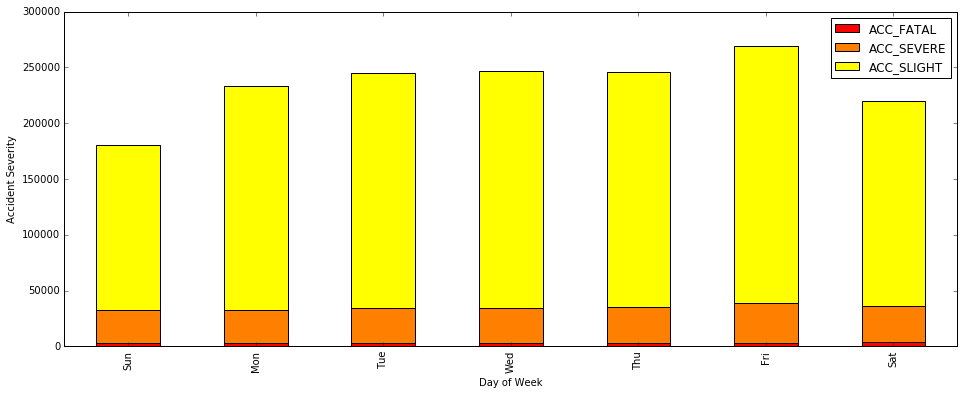

In [6]:
RoadSafetyData.pivot_table(columns='Day_of_Week')
delays_list = ['ACC_FATAL','ACC_SEVERE','ACC_SLIGHT']
RoadSafetyData_by_day = RoadSafetyData.pivot_table(index='Day_of_Week', values=delays_list, aggfunc='sum')
RoadSafetyData_by_day.plot(kind='bar', figsize=[16,6], stacked=True, colormap='autumn') # area plot
ax1 = plt.axes()
ax1.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('Accident Severity')
#plt.title('Comparison of Accident Severity')


In [26]:
RoadSafetyData_by_day.columns = ['Fatal Accidents', 'Severe Accidents', 'Slight Accidents']
RoadSafetyData_by_day

,Fatal Accidents,Severe Accidents,Slight Accidents
Day_of_Week,,,
1,3403,28908,147757
2,2762,30024,200452
3,2732,31299,211244
4,2702,31318,213002
5,2807,32114,211094
6,3273,35513,230199
7,3703,32866,183425


Day of Week
1 - Sunday, 2 - Monday, 3 - Tuesday, 4 - Wednesday, 5 - Thursday, 6 - Friday, 7 - Saturday

Accident Severity
1 - Fatal, 2 - Serious, 3 - Slight

Based on the above chart, we observe that
a. Most accidents are slight injuries and fatal accidents are at the minimum.
b. Friday seems to have more accidents and accidents are progressive starting Sunday.

### Number of accidents by Number of Vehicles

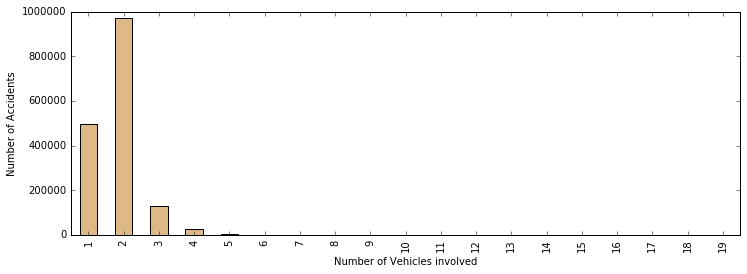

In [7]:
temp1 =  RoadSafetyData[ (RoadSafetyData.ACC_COUNT > 0) & (RoadSafetyData.Number_of_Vehicles < 20) ]
temp2 = temp1.groupby('Number_of_Vehicles').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.rcParams['figure.figsize'] = 12, 4 
plt.xlabel('Number of Vehicles involved')
plt.ylabel('Number of Accidents')
#plt.title(' Number of Accidents by Number of Vehicles involved')

### Number of accidents by Number of Casualties

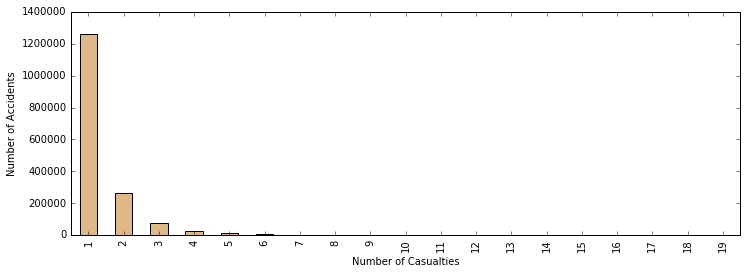

In [8]:
temp1 =  RoadSafetyData[(RoadSafetyData.ACC_COUNT > 0) & (RoadSafetyData.Number_of_Casualties < 20)]
temp2 = temp1.groupby('Number_of_Casualties').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Number of Casualties')
plt.ylabel('Number of Accidents')
#plt.title(' Number of Accidents by Number of Casualties')

### Number of accidents by Day of Week

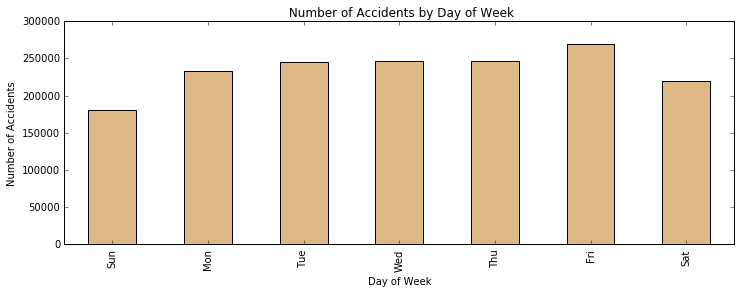

In [31]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Day_of_Week').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
ax1 = plt.axes()
ax1.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.title(' Number of Accidents by Day of Week')

### Number of accidents by Speed Limit

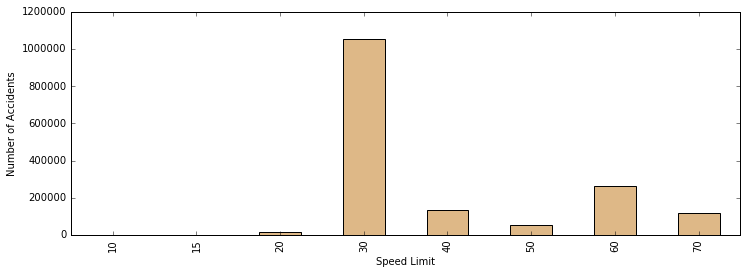

In [9]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Speed_limit').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
#plt.title(' Number of Accidents by Speed Limit')

1 - Pedal cycle, 3 - Motorcycle 125cc and under, 5 - Motorcycle over 500cc
8 - Taxi/Private hire car, 9 - Car, 19	Van / Goods 3.5 tonnes mgw or under

The highest casue of accidents are Cars and other vehicles are are at the minimum.

### Number of accidents by Light conditions

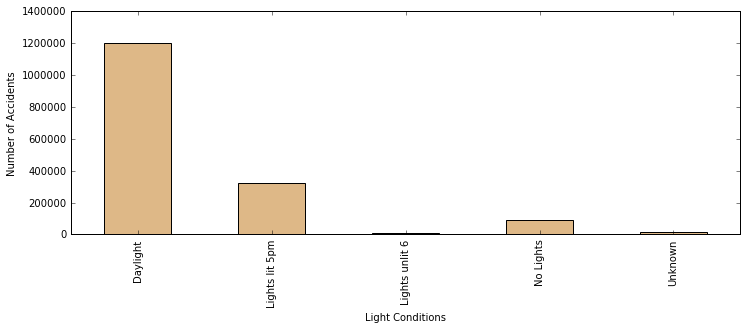

In [10]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Light_Conditions').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
ax1 = plt.axes()
ax1.set_xticklabels(['Daylight', 'Lights lit 5pm', 'Lights unlit 6', 'No Lights', 'Unknown'])
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
#plt.title(' Number of Accidents based on Light Conditions')

1	Daylight
4	Darkness - lights lit
5	Darkness - lights unlit
6	Darkness - no lighting
7	Darkness - lighting unknown

More accidents have occurred during the day.

### Number of accidents by Weather conditions

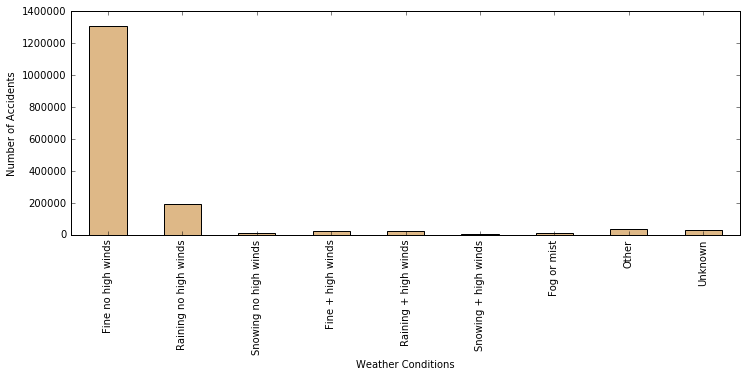

In [11]:
temp1 =  RoadSafetyData[ (RoadSafetyData.ACC_COUNT > 0) & (RoadSafetyData.Weather_Conditions <> -1)]
temp2 = temp1.groupby('Weather_Conditions').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
ax1 = plt.axes()
ax1.set_xticklabels(['Fine no high winds', 'Raining no high winds', 'Snowing no high winds', 
                     'Fine + high winds','Raining + high winds','Snowing + high winds','Fog or mist','Other','Unknown'])
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
#plt.title(' Number of Accicents based on Weather Conditions')

1 - Fine no high winds, 2 - Raining no high winds, 3 - Snowing no high winds, 4 - Fine + high winds
5 - Raining + high winds, 6 - Snowing + high winds, 7 - Fog or mist, 8 - Other, 9 - Unknown

Most accidents have happened under clear weather followed by Rain.

### Number of accidents by Urban or Rural Area

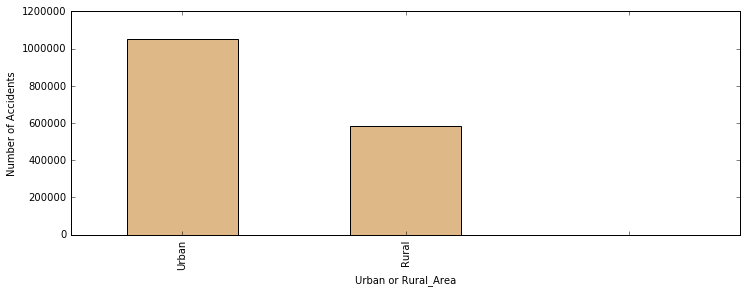

In [12]:
temp1 =  RoadSafetyData[ RoadSafetyData.ACC_COUNT > 0]
temp2 = temp1.groupby('Urban_or_Rural_Area').ACC_COUNT.count()
temp2.plot(kind='bar', color='#DEB887')
ax1 = plt.axes()
ax1.set_xticklabels(['Urban', 'Rural'])
plt.xlabel('Urban or Rural_Area')
plt.ylabel('Number of Accidents')
#plt.title(' Number of Accidents based on Urban or Rural Area')

### Plotting all Fatal Accidents location on a map using Latitude and Longitude.

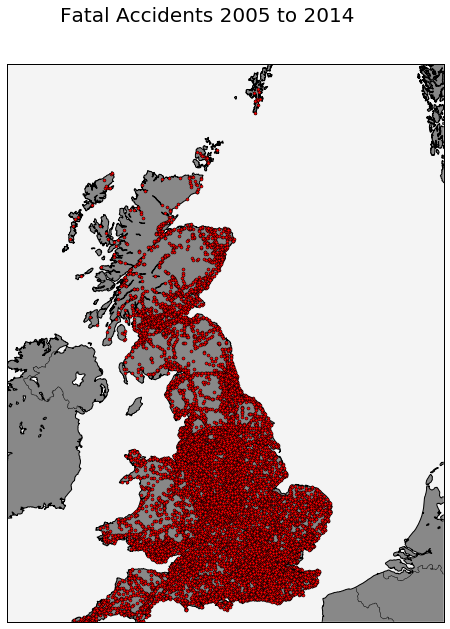

In [10]:
# Import pandas
import pandas as pd

# Import matplotlib and Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline

# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))
fig.suptitle('Fatal Accidents 2005 to 2014', fontsize=20)
# Create a map, using the Gall–Peters projection,  gall

map = Basemap(width=120000000,height=90000000,projection='lcc', llcrnrlon=-7.5600,llcrnrlat=49.9600,urcrnrlon=5.7800,
              urcrnrlat=60.8400, resolution = 'h', epsg=5520)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
fatal_data = RoadSafetyData[RoadSafetyData['ACC_FATAL'] == 1]
x,y = map(fatal_data['Longitude'].values, fatal_data['Latitude'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=3)

# Show the map
plt.show()

## Perform Logistic Regression using StatsModels

d:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Optimization terminated successfully.
         Current function value: 0.064556
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              ACC_FATAL   No. Observations:              1640597
Model:                          Logit   Df Residuals:                  1640584
Method:                           MLE   Df Model:                           12
Date:                Mon, 05 Dec 2016   Pseudo R-squ.:                 0.07134
Time:                        19:50:59   Log-Likelihood:            -1.0591e+05
converged:                       True   LL-Null:                   -1.1405e+05
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
intercept               -3.1182      0.612     -5.094      0.000        -4.318    -1.918

[]

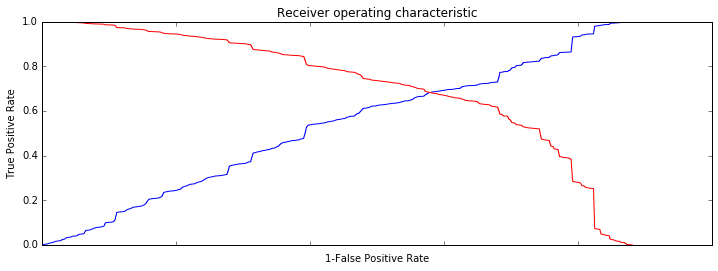

In [3]:
#Reading the data from 2005 - 2014 Accident Data
df = pd.read_csv("Accidents2005to2014.csv")
df['ACC_FATAL'] = np.where(df.Accident_Severity == 1, 1 , 0)

#df.head()

#drop unnecesary columns
df.drop(['Unnamed: 0', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude'], axis=1, inplace=True)
df.drop(['Date', 'Time', 'LSOA_of_Accident_Location'], axis=1, inplace=True)

df.columns = ['﻿Accident_Index','Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Day_of_Week',
              'Speed_limit','Light_Conditions','Weather_Conditions','Urban_or_Rural_Area','ACC_FATAL']

# making speed limit a dummy column
dummy_ranks = pd.get_dummies(df['Speed_limit'], prefix='Speed_limit')

# create a clean data frame for the regression
cols_to_keep = ['Day_of_Week', 'Speed_limit', 'Light_Conditions', 
                'Weather_Conditions', 'Urban_or_Rural_Area','Number_of_Vehicles', 'Number_of_Casualties','ACC_FATAL']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'Speed_limit_2':])

# manually add the intercept to gaurantee that the residuals have a mean of zero
data['intercept'] = 1

train_cols = data[['intercept','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Light_Conditions',
                   'Weather_Conditions', 'Urban_or_Rural_Area',
                   'Speed_limit_20' ,'Speed_limit_30','Speed_limit_40', 'Speed_limit_50', 
                   'Speed_limit_60', 'Speed_limit_70' ]]
#train_cols.head()

test_cols = data['ACC_FATAL']
#test_cols.head()


result = sm.Logit(test_cols, train_cols).fit()
print result.summary()

# Add prediction to dataframe
data['pred'] = result.predict(train_cols)

fpr, tpr, thresholds =roc_curve(data['ACC_FATAL'], data['pred'])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 
                    'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

[]

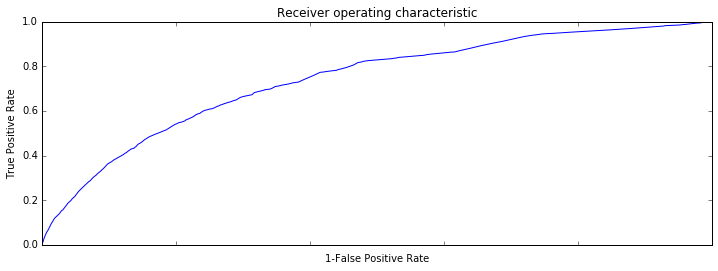

In [4]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['fpr'], roc['tpr'])
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])